# scikit-FIBERS Example Code

## Installation and Imports 
How to setup and use scikit-FIBERS

In [1]:
!pip install scikit-fibers==0.9.3

In [2]:
import pandas as pd
from skfibers import FIBERS
from sklearn.metrics import classification_report
from skfibers.experiments import create_data_simulation_bin

## Creating Simulation Data by provided functionality

In [3]:
data = create_data_simulation_bin(number_of_instances=10000, number_of_features=50, number_of_features_in_bin=10,
                                  no_fail_proportion=0.5, mm_frequency_range=(0.4, 0.5), noise_frequency=0.1,
                                  class0_time_to_event_range=(1.5, 0.2), class1_time_to_event_range=(1, 0.2),
                                  censoring_frequency=0.5, random_seed=42, negative=False)
data.to_csv('sampledata.csv')
data = pd.read_csv('sampledata.csv')
true_risk_group = data[['TrueRiskGroup']]
data = data.drop('TrueRiskGroup', axis=1)

## Fitting FIBERS on the Data

In [4]:
fibers = FIBERS(label_name="Censoring", duration_name="Duration", 
                given_starting_point=False, amino_acid_start_point=None,
                amino_acid_bins_start_point=None, iterations=100, 
                set_number_of_bins=50, min_features_per_group=2,
                max_number_of_groups_with_feature=2, 
                informative_cutoff=0.2, crossover_probability=0.8,
                mutation_probability=0.4, elitism_parameter=0.8,
                random_seed=42)
fibers = fibers.fit(data)

100%|█████████████████████████████████████████| 100/100 [01:53<00:00,  1.13s/it]


## Accessing results and internal functions

### Summary of Top Bin Statistics

In [5]:
bin_summary, logrank_results = fibers.get_bin_summary()
logrank_results

,0
Bin #,Bin 1
Top Bin of Features:,"[P_1, P_10, P_9, P_4, P_7]"
Log-Rank Score,2586.469639
Number of Instances with No Mismatches in Bin:,5102
Number of Instances with Mismatch(es) in Bin:,4898
p-value from Log Rank Test:,0.0


### All Bins and coressponding Log-Rank Scores

In [6]:
fibers.get_bin_scores().head(10)

,Bin #,Score,Bins
0,Bin 1,2586.469639,"[P_1, P_10, P_9, P_4, P_7]"
1,Bin 2,2467.265990,"[P_6, P_7, P_10, P_1]"
2,Bin 3,2392.299297,"[P_1, P_5, P_8, P_4]"
3,Bin 4,2377.591105,"[P_8, P_5, P_10, P_3]"
4,Bin 5,2375.992957,"[P_4, P_3, P_8, P_7]"
5,Bin 6,2371.716819,"[P_9, P_4, P_7, P_10]"
6,Bin 7,2352.153826,"[P_4, P_8, P_3, P_6]"
7,Bin 8,2148.246436,"[P_1, P_4, P_2]"
8,Bin 9,2098.931835,"[P_10, P_6, P_4]"
9,Bin 10,2084.563964,"[P_10, P_2, P_5]"


### Viewing Kaplan Meier Survival Plot

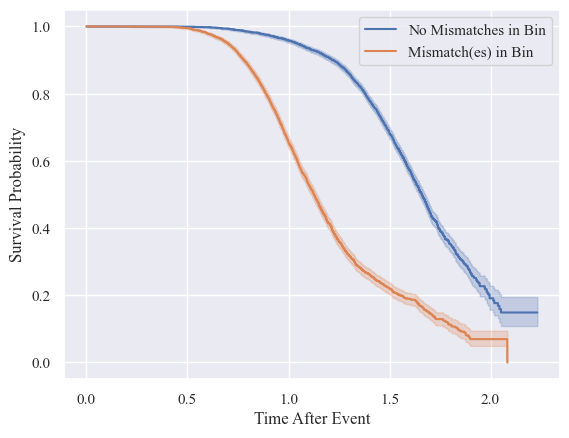

In [7]:
fibers.get_bin_survival_plot(show=True)

### Viewing Transformed Rules/Bins/Features

In [8]:
data_tranformed = fibers.transform(data)
data_tranformed

,Bin 1,Bin 2,Bin 3,Bin 4,Bin 5,Bin 6,Bin 7,Bin 8,Bin 9,Bin 10,...,Bin 48,Bin 42,Bin 50,Bin 43,Bin 44,Bin 49,Bin 41,Bin 45,Bin 46,Bin 47
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
1,1,2,3,2,1,0,2,1,1,1,...,1,1,2,1,1,1,1,3,2,2
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,1
3,3,2,3,1,2,2,1,2,1,1,...,2,2,1,2,1,0,1,4,3,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,1,1
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,2,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,1,2,0
9998,1,1,2,1,1,1,2,2,2,2,...,2,3,2,2,3,1,1,5,2,1


### Checking Top Rule Train Accuracy

In [9]:
print("Accuracy: ", fibers.score(data, true_risk_group))

Accuracy:  0.9898


In [10]:
y = fibers.predict(data)

In [11]:
print(classification_report(y, true_risk_group))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5102
           1       0.98      1.00      0.99      4898

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

